<a href="https://colab.research.google.com/github/prethasur/Employee-Turnover/blob/main/employee_to.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Insights : 
1. most sales representatives leave their jobs
2. People around 20 years of age leave their jobs the most
3. Single people leave their jobs more often
4. people with technical degree and marketing in education field leave their jobs more.
5. frequent travel, overtime are reasons for attrition
6. people who live around 15 km away leave the job most often
7. low job involvement, low Job Satisfaction, job level= 1 relates to attrition most
8. People with monthly income < 5k leave their jobs most often
9. bad work life balance relates to attrition
10. total working years less than 2 or years at company = 30 has huge attrition rate

Results : 
Random Forest - accuracy of 98.5%, f1score = 98.60
Stacking - accuracy of 98.7% , f1score = 98.79

## Plan forward

1.   import dependancies
2.   preprocessing
3.   EDA
4.   Fit models






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report, confusion_matrix, cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/datascience projects/test-assignments/employee-trunover/Employee-turnover.csv")



## Univariate Analysis & Encoding of Categorical Features



In [ ]:
data.tail()

Employee Count  Employee ID              Department  \
1465               1         2061  Research & Development   
1466               1         2062  Research & Development   
1467               1         2064  Research & Development   
1468               1         2065                   Sales   
1469               1         2068  Research & Development   

                       Job Role Gender  Age Marital Status      Education  \
1465      Laboratory Technician   Male   36        Married        College   
1466  Healthcare Representative   Male   39        Married  Below College   
1467     Manufacturing Director   Male   27        Married       Bachelor   
1468            Sales Executive   Male   49        Married       Bachelor   
1469      Laboratory Technician   Male   34        Married       Bachelor   

     Education Field    Business Travel  ...  Total Working Years  \
1465         Medical  Travel_Frequently  ...                   17   
1466         Medical      Travel_Rarely  ...                    9   
1467   Life Sciences      Travel_Rarely  ...                    6   
1468         Medical  Travel_Frequently  ...                   17   
1469         Medical      Travel_Rarely  ...                    6   

     Years At Company  Years In Current Role Years Since Last Promotion  \
1465                5                      2                          0   
1466                7                      7                          1   
1467                6                      2                          0   
1468                9                      6                          0   
1469                4                      3                          1   

      Years With Curr Manager  Environment Satisfaction  \
1465                        3                      High   
1466                        7                 Very High   
1467                        3                    Medium   
1468                        8                 Very High   
1469                        2                    Medium   

      Training Times Last Year Work Life Balance  Relationship Satisfaction  \
1465                         3            Better                       High   
1466                         5            Better                        Low   
1467                         0            Better                     Medium   
1468                         3              Good                  Very High   
1469                         3              Best                        Low   

      Attrition (Yes/No)  
1465                  No  
1466                  No  
1467                  No  
1468                  No  
1469                  No  

[5 rows x 29 columns]

In [ ]:
data1= data.copy()

In [ ]:
data['Employee Count'].value_counts() #1 for all, no meaning; hence drop

1    1470
Name: Employee Count, dtype: int64

In [ ]:
data1.drop('Employee Count', axis=1, inplace=True)

In [ ]:
data['Employee ID'].value_counts().sum() #unique, not needed for our model, drop

1470

In [ ]:
data1.drop('Employee ID', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


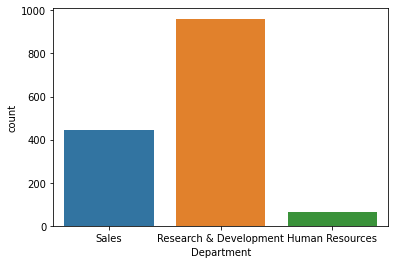

In [ ]:
sns.countplot(data['Department']) #nominal categorical- we will try one-hot encoding

In [ ]:
enc=OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(data1[['Department']]).toarray())
enc_df.columns = ['Human Resources', 'Research & Development','Sales']
data1.drop('Department', axis=1, inplace=True)

In [ ]:
enc_df.drop('Human Resources', axis=1, inplace=True) #when RnD and sales it means HR
data1=data1.join(enc_df)

In [ ]:
data['Job Role'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: Job Role, dtype: int64

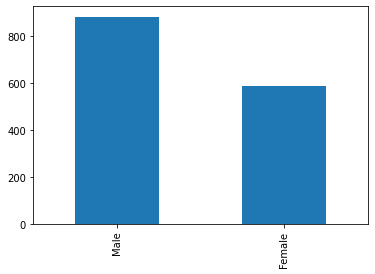

In [ ]:
data['Gender'].value_counts().plot.bar()

In [ ]:
data1.Gender.replace('Female',1,inplace=True)
data1.Gender.replace('Male',0,inplace=True)

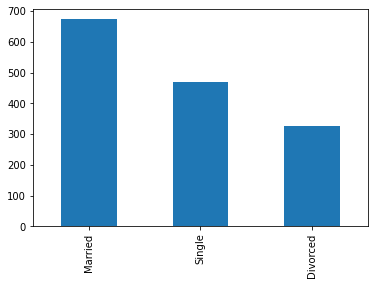

In [ ]:
data['Marital Status'].value_counts().plot.bar()

In [ ]:
data1['Marital Status'].replace('Divorced',2,inplace=True)
data1['Marital Status'].replace('Married',1,inplace=True)
data1['Marital Status'].replace('Single',0,inplace=True)

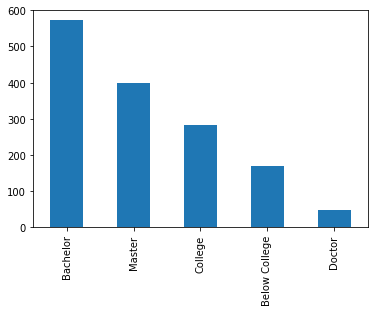

In [ ]:
data['Education'].value_counts().plot.bar()

In [ ]:
data1['Education'].replace('Doctor',4,inplace=True)
data1['Education'].replace('Master',3,inplace=True)
data1['Education'].replace('Bachelor',2,inplace=True)
data1['Education'].replace('College',1,inplace=True)
data1['Education'].replace('Below College',0,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


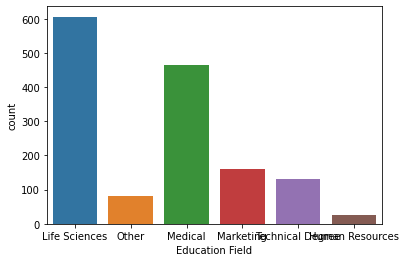

In [ ]:
sns.countplot(data['Education Field'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


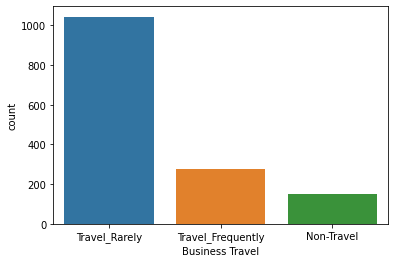

In [ ]:
sns.countplot(data['Business Travel'])

In [ ]:
data1['Business Travel'].replace('Travel_Frequently',2,inplace=True)
data1['Business Travel'].replace('Travel_Rarely',1,inplace=True)
data1['Business Travel'].replace('Non-Travel',0,inplace=True)

In [ ]:
data['Job Involvement'].value_counts()#ordinal, label encode

High         868
Medium       375
Very High    144
Low           83
Name: Job Involvement, dtype: int64

In [ ]:
data1['Job Involvement'].replace('Very High',3,inplace=True)
data1['Job Involvement'].replace('High',2,inplace=True)
data1['Job Involvement'].replace('Medium',1,inplace=True)
data1['Job Involvement'].replace('Low',0,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


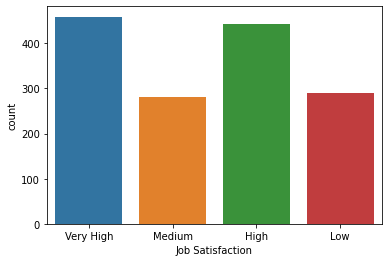

In [ ]:
sns.countplot(data['Job Satisfaction']) #ordinal, label encode

In [ ]:
data1['Job Satisfaction'].replace('Very High',3,inplace=True)
data1['Job Satisfaction'].replace('High',2,inplace=True)
data1['Job Satisfaction'].replace('Medium',1,inplace=True)
data1['Job Satisfaction'].replace('Low',0,inplace=True)

In [ ]:
data['Over Time'].value_counts()

No     1054
Yes     416
Name: Over Time, dtype: int64

In [ ]:
data1['Over Time'].replace('Yes',1,inplace=True)
data1['Over Time'].replace('No',0,inplace=True)

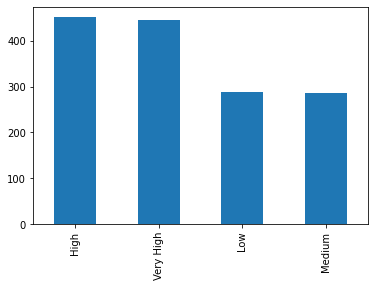

In [ ]:
data['Environment Satisfaction'].value_counts().plot.bar()#ordinal, label encode

In [ ]:
data1['Environment Satisfaction'].replace('Very High',3,inplace=True)
data1['Environment Satisfaction'].replace('High',2,inplace=True)
data1['Environment Satisfaction'].replace('Medium',1,inplace=True)
data1['Environment Satisfaction'].replace('Low',0,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


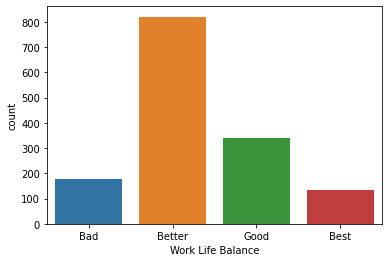

In [ ]:
sns.countplot(data['Work Life Balance']) #ordinal, label encode

In [ ]:
data1['Work Life Balance'].replace('Best',3,inplace=True)
data1['Work Life Balance'].replace('Better',2,inplace=True)
data1['Work Life Balance'].replace('Good',1,inplace=True)
data1['Work Life Balance'].replace('Bad',0,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


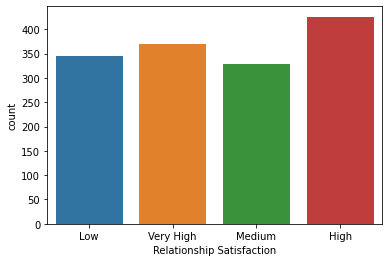

In [ ]:
sns.countplot(data['Relationship Satisfaction']) #ordinal, label encode

In [ ]:
data1['Relationship Satisfaction'].replace('Very High',3,inplace=True)
data1['Relationship Satisfaction'].replace('High',2,inplace=True)
data1['Relationship Satisfaction'].replace('Medium',1,inplace=True)
data1['Relationship Satisfaction'].replace('Low',0,inplace=True)

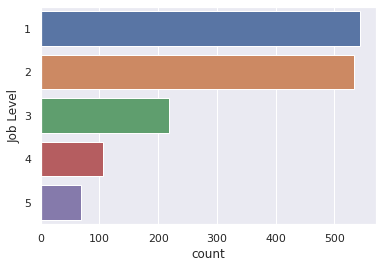

In [ ]:
sns.countplot(y=data1['Job Level'])

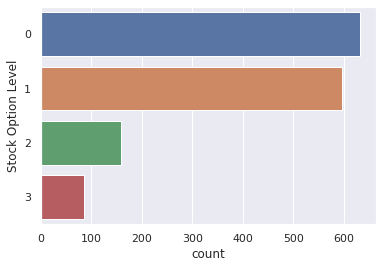

In [ ]:
sns.countplot(y=data1['Stock Option Level'])

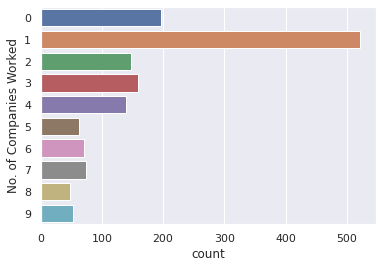

In [ ]:
sns.countplot(y=data1['No. of Companies Worked'])

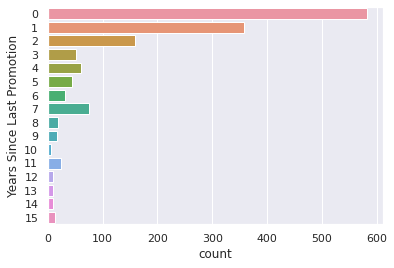

In [ ]:
sns.countplot(y=data1['Years Since Last Promotion'])

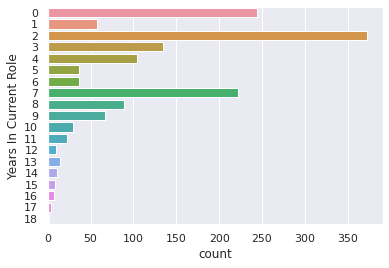

In [ ]:
sns.countplot(y=data1['Years In Current Role'])

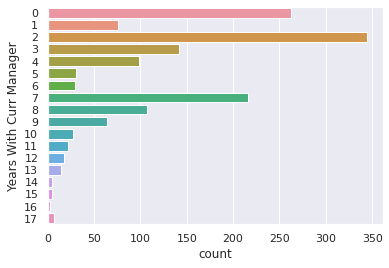

In [ ]:
sns.countplot(y=data1['Years With Curr Manager'])

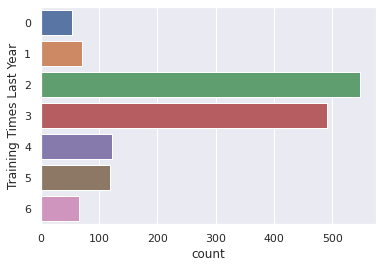

In [ ]:
sns.countplot(y=data1['Training Times Last Year'])

In [ ]:
data['Attrition (Yes/No)'].value_counts() #Imbalanced data! we will balance it 
                                          # after EDA

No     1233
Yes     237
Name: Attrition (Yes/No), dtype: int64

In [ ]:
data1['Attrition (Yes/No)'].replace('Yes',1,inplace=True)
data1['Attrition (Yes/No)'].replace('No',0,inplace=True)

In [ ]:
data1.head()

Job Role  Gender  Age  Marital Status  Education  \
0        Sales Executive       1   41               0          1   
1     Research Scientist       0   49               1          0   
2  Laboratory Technician       0   37               0          1   
3     Research Scientist       1   33               1          3   
4  Laboratory Technician       0   27               1          0   

  Education Field  Business Travel  Distance From Home (kms)  Job Involvement  \
0   Life Sciences                1                         1                2   
1   Life Sciences                2                         8                1   
2           Other                1                         2                1   
3   Life Sciences                2                         3                2   
4         Medical                1                         2                2   

   Job Level  ...  Years In Current Role  Years Since Last Promotion  \
0          2  ...                      4                           0   
1          2  ...                      7                           1   
2          1  ...                      0                           0   
3          1  ...                      7                           3   
4          1  ...                      2                           2   

   Years With Curr Manager  Environment Satisfaction  \
0                        5                         1   
1                        7                         2   
2                        0                         0   
3                        0                         3   
4                        2                         0   

   Training Times Last Year  Work Life Balance  Relationship Satisfaction  \
0                         0                  0                          0   
1                         3                  2                          3   
2                         3                  0                          1   
3                         3                  2                          2   
4                         3                  2                          3   

   Attrition (Yes/No)  Research & Development  Sales  
0                   1                     0.0    1.0  
1                   0                     1.0    0.0  
2                   1                     1.0    0.0  
3                   0                     1.0    0.0  
4                   0                     1.0    0.0  

[5 rows x 28 columns]

##Univariate Analysis of Numeric Features

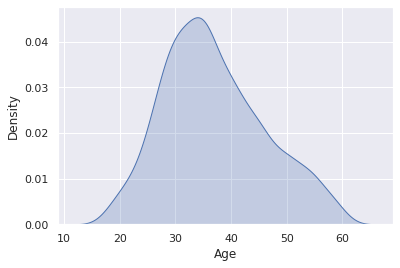

In [ ]:
sns.kdeplot(data1['Age'], shade=True) #almost normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


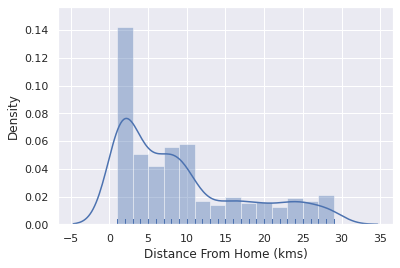

In [ ]:
sns.distplot(data1['Distance From Home (kms)'], rug=True, hist=True) #skewed

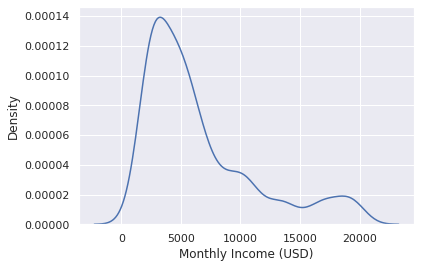

In [ ]:
sns.kdeplot(data1['Monthly Income (USD)']) # skewed

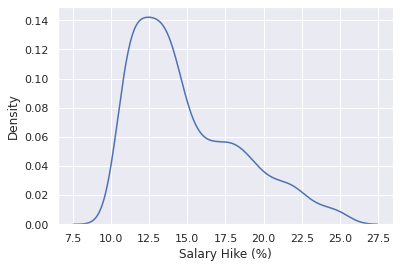

In [ ]:
sns.kdeplot(data1['Salary Hike (%)']) #skwed

##Bivariate Analysis


1. Handling Missing values
1. Handling Duplicates & correlations

In [ ]:
data1.isnull().sum()  #no missing values

Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance From Home (kms)      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
Research & Development        0
Sales                         0
dtype: int64

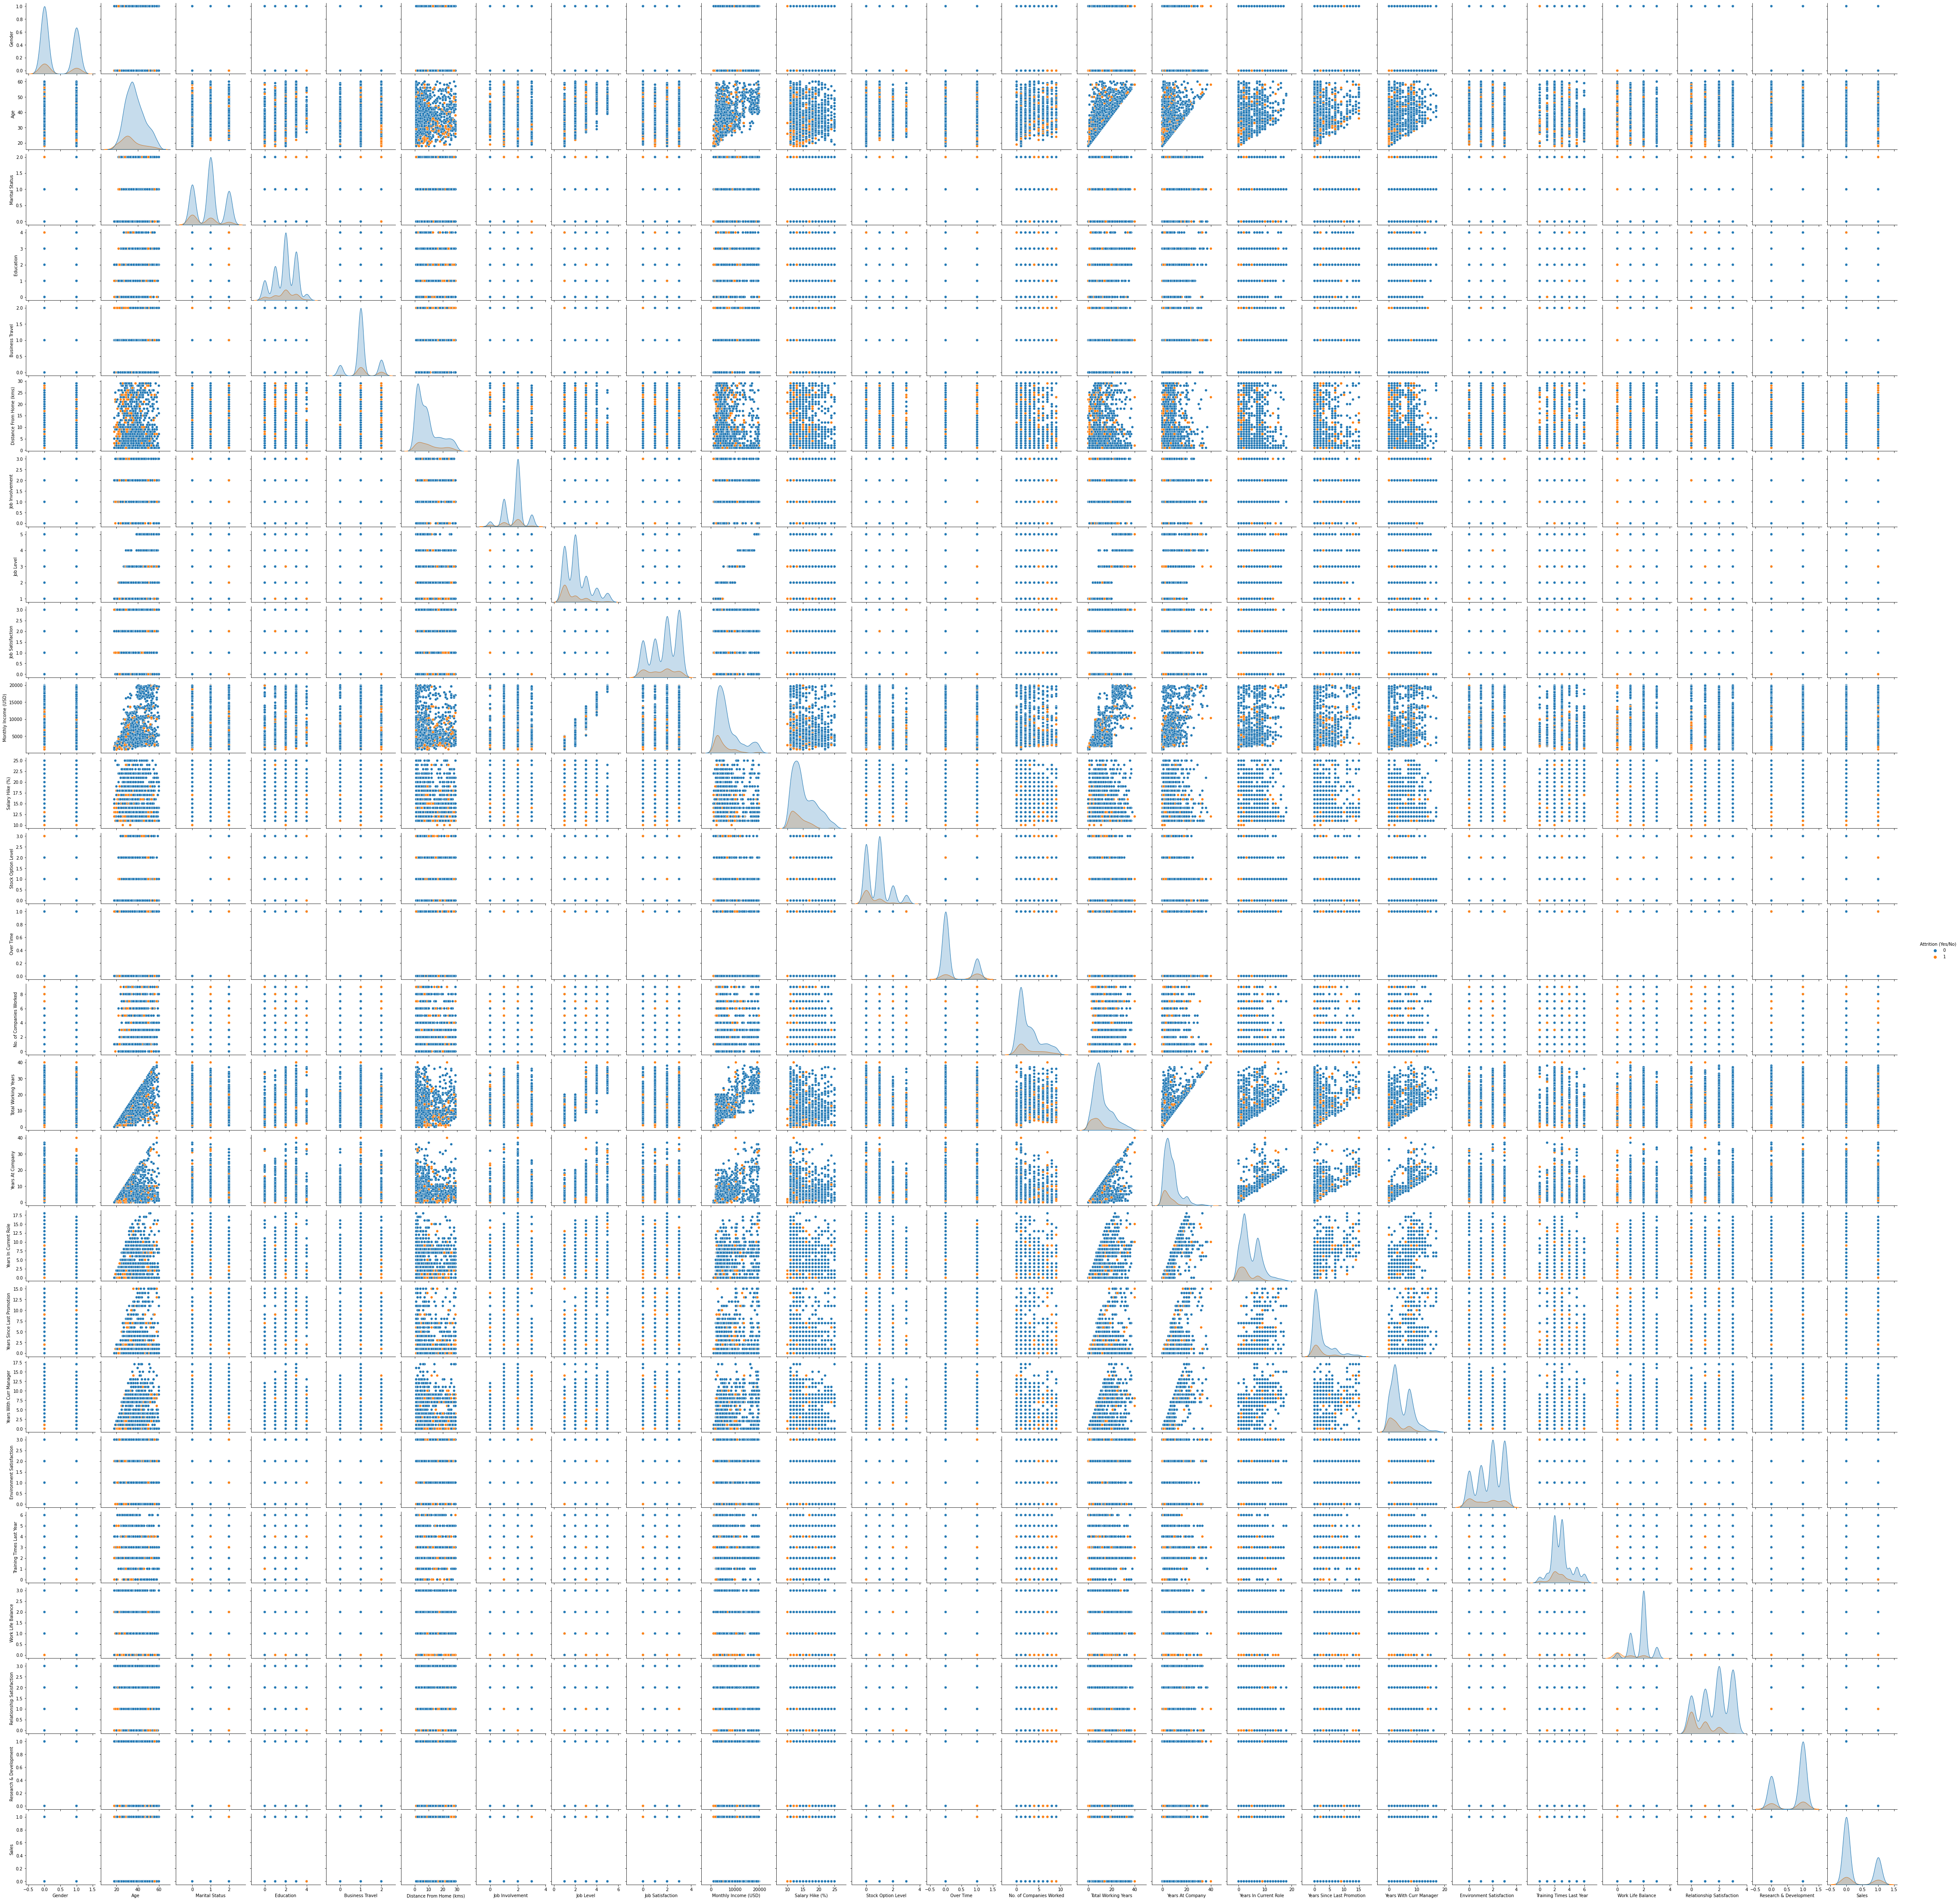

In [ ]:
#now let's check for correlations
#sns.pairplot(data1, hue='Attrition (Yes/No)')

In [ ]:
sns.heatmap(data1,cmap='RdYlGn',linewidths=0.30)

In [ ]:
data1.duplicated().value_counts() #no duplicates

False    1470
dtype: int64

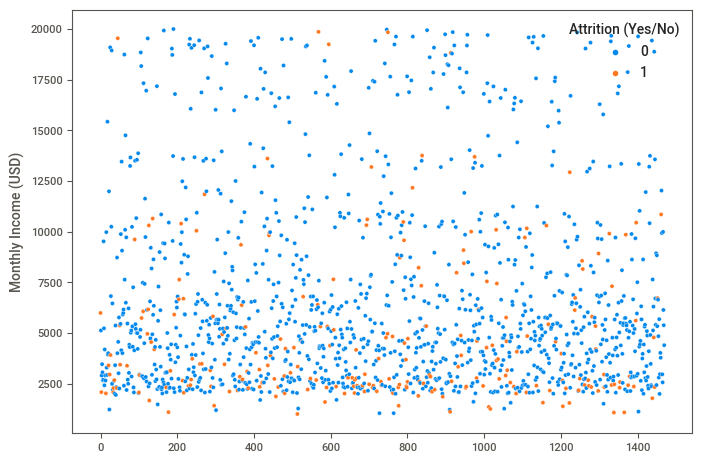

In [ ]:
sns.scatterplot(x=data1.index,y=data1['Monthly Income (USD)'], hue=data1['Attrition (Yes/No)'])

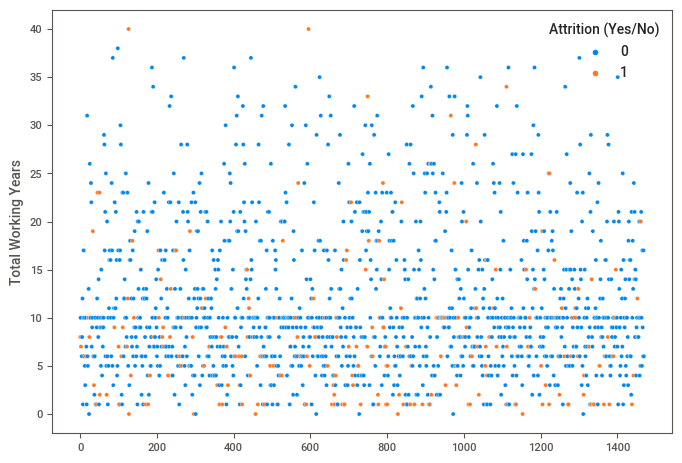

In [ ]:
sns.scatterplot(x=data1.index,y=data1['Total Working Years'], hue=data1['Attrition (Yes/No)'])

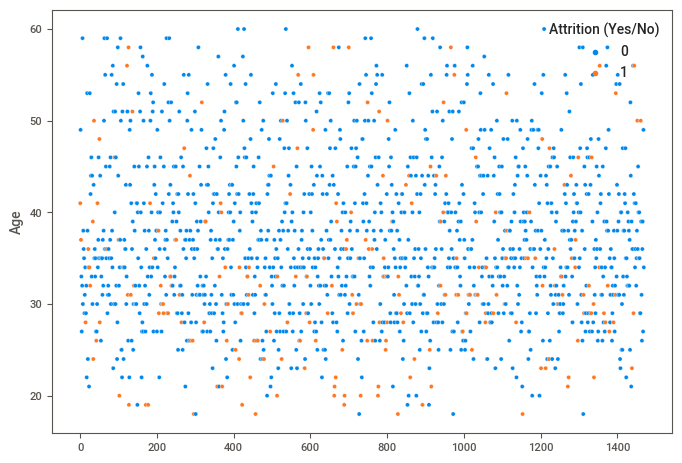

In [ ]:
sns.scatterplot(x=data1.index,y=data1['Age'], hue=data1['Attrition (Yes/No)'])

In [ ]:
data1.drop('Job Role', axis=1, inplace=True)
data1.drop('Job Level', axis=1, inplace=True) #highly correlated with monthly income, age and years of experience 
data1.drop('Education Field', axis=1, inplace=True)

## ML Model :

In [ ]:
X = data1.drop('Attrition (Yes/No)', axis=1)
Y = data1['Attrition (Yes/No)']
Data_rs=RandomOverSampler(sampling_strategy='minority')
X_res, Y_res = Data_rs.fit_resample(X, Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.2,random_state=100)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
y_lr_PRED=LR.predict(X_test)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_dt_PRED=dt.predict(X_test)

In [ ]:
svm = svm.SVC() 
svm.fit(X_train,Y_train)
y_svm_PRED=svm.predict(X_test)

In [ ]:
rf = RandomForestClassifier() 
rf.fit(X_train,Y_train)
y_rf_PRED=rf.predict(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, Y_train)
y_knn_PRED=knn.predict(X_test)

In [ ]:
def Report(Y_test,y_pred):

  print(accuracy_score(Y_test, y_pred))
  print(precision_score(Y_test, y_pred))
  print(recall_score(Y_test, y_pred))
  print(f1_score(Y_test, y_pred))
  print(confusion_matrix(Y_test,y_pred))
  print(cohen_kappa_score(Y_test,y_pred))
  print(roc_auc_score(Y_test,y_pred))

In [ ]:
Report(Y_test,y_lr_PRED)

0.7874493927125507
0.7958333333333333
0.7732793522267206
0.784394250513347
[[198  49]
 [ 56 191]]
0.5748987854251012
0.7874493927125508


In [ ]:
Report(Y_test,y_dt_PRED)

0.951417004048583
0.9176029962546817
0.9919028340080972
0.953307392996109
[[225  22]
 [  2 245]]
0.902834008097166
0.9514170040485831


In [ ]:
Report(Y_test,y_svm_PRED)

0.611336032388664
0.6502732240437158
0.4817813765182186
0.5534883720930233
[[183  64]
 [128 119]]
0.22267206477732793
0.611336032388664


In [ ]:
Report(Y_test,y_rf_PRED)

0.9858299595141701
0.9724409448818898
1.0
0.9860279441117765
[[240   7]
 [  0 247]]
0.97165991902834
0.98582995951417


In [ ]:
Report(Y_test,y_knn_PRED)

0.6821862348178138
0.6642335766423357
0.7368421052631579
0.6986564299424184
[[155  92]
 [ 65 182]]
0.3643724696356275
0.6821862348178138


we should do hyperparameter tuning for each model using libs like randomisedSearchCv or GridSearchCV to find out the best params. It takes some time, in lack of which i will skip the step here.
Instead we will try out stacking, an ensemble technique to see if we can improve on the random forest results by combining the best 3 classifiers

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
stack = StackingClassifier(estimators = [('rf', rf),('dt',dt)], final_estimator=LR, cv=5)

In [ ]:
stack.fit(X_train,Y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred=stack.predict(X_test)

In [ ]:
Report(Y_test,y_pred)

random over sample
0.9878542510121457
0.9839357429718876
0.9919028340080972
0.9879032258064516
[[243   4]
 [  2 245]]
0.9757085020242915
0.9878542510121459


that's a sweet but too little improvement. we will see even better results on tuning hyperparams